# Project Description
In this project I have some non linear data where there are two clusters/categories that I want to classify. I will do this by testing different classification algorithms (logistic regression, k nearest neighbors, desicion trees) and testing out which one gives the best results. 


In this project I will attempt to find the best performing machine learning classification algorithm to solve a problem. The problem in this project is we have some non linear data where we have two clusters or segments that are overlapping. We want to try and see which classification algorithm will best solve this issue. What I will do in this project is load my data in. Graph the data so we can see what it looks like and if it can give us insights onto how to solve the problem. I'll then use multiple classification algorithms to see which one performes best and gives the best accuracy. 

# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

# Data Exploration

In [2]:
X_train = pd.read_csv('./data/X_train.csv')
y_train = pd.read_csv('./data/y_train.csv')
X_test = pd.read_csv('./data/X_test.csv')
y_test = pd.read_csv('./data/y_test.csv')

In [3]:
X_train

,col1,col2
0,0.283087,-0.197163
1,0.986381,0.164478
2,-0.952769,0.303694
3,1.979364,0.297895
4,1.399762,-0.416619
...,...,...
599995,0.980339,0.197321
599996,0.570858,0.821049
599997,-0.518881,0.854846
599998,0.185451,-0.080095


## Graphing the Data
Graphing the data can give us insights into the data. In this case we can see that its non linear data. We can also see that there are two ddifferent segments or clusters. 

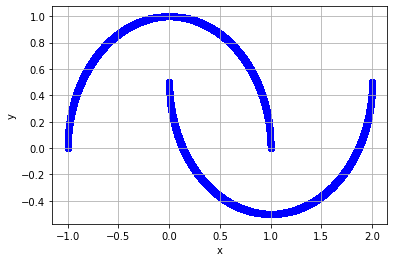

In [4]:
%matplotlib inline 
plt.scatter(X_train['col1'], X_train['col2'], color='b')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show();

In [5]:
y_train = y_train['outputs'].to_numpy() # reformat data to numpy array so we can use it more easily

# Using Logistic Regression

In [6]:
from sklearn.linear_model import LogisticRegression # import model

In [7]:
logistic_regression = LogisticRegression() # create the model 

In [8]:
logistic_regression = logistic_regression.fit(X_train, y_train) # train model on the training data

In [10]:
logistic_regression.score(X_test, y_test) # get test accuracy

0.894175

In [11]:
logistic_regression.score(X_train, y_train) # get train accuracy

0.8937433333333333

In [29]:
xx, yy = np.mgrid[-5:5:.01, -5:5:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = logistic_regression.predict_proba(grid)[:, 1].reshape(xx.shape)

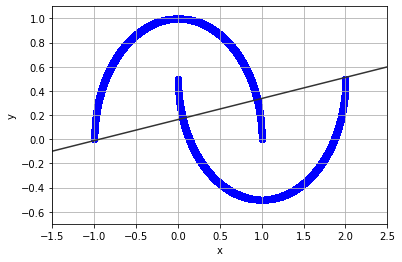

In [45]:
plt.contour(xx, yy, probs, levels=[.5], cmap="Greys", vmin=0, vmax=.6)
plt.scatter(X_train['col1'], X_train['col2'], color='b')
plt.xlim([-1.5, 2.5])
plt.ylim([-.7, 1.1])
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show();

# Using KNN

In [14]:
from sklearn.neighbors import KNeighborsClassifier # import model

In [15]:
neighboors = KNeighborsClassifier(n_neighbors=7) # create model with 7 neighbors to define

In [16]:
neighboors = neighboors.fit(X_train, y_train) # train the model

KNeighborsClassifier(n_neighbors=7)

In [31]:
neighboors.score(X_test, y_test) # get test accuracy

1.0

In [36]:
neighboors.fit(X_train, y_train).score(X_train, y_train) # get training accuracy

1.0

/Users/GaelGil/Desktop/GitRepos/notebooks/classification_analysis/env/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  if sys.path[0] == '':


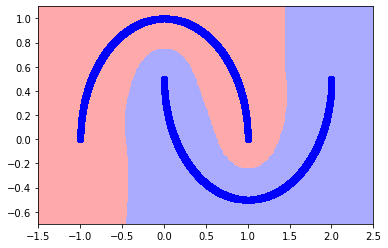

In [43]:
from matplotlib.colors import ListedColormap

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

xx, yy = np.mgrid[-5:5:.01, -5:5:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
Z = neighboors.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

plt.scatter(X_train['col1'], X_train['col2'], color='b')
plt.xlim([-1.5, 2.5])
plt.ylim([-.7, 1.1])
plt.show()

# Using Descion Trees

In [20]:
from sklearn import tree # import model

In [21]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [22]:
clf.predict(X_test)

array([0, 0, 0, ..., 0, 1, 1])

In [23]:
clf.score(X_train, y_train)

1.0

In [24]:
clf.score(X_test, y_test)

0.99996

[Text(167.40000000000003, 199.32, 'X[1] <= 0.5\ngini = 0.5\nsamples = 600000\nvalue = [299941, 300059]'),
 Text(66.96000000000001, 163.07999999999998, 'X[0] <= -0.433\ngini = 0.375\nsamples = 400072\nvalue = [100016, 300056]'),
 Text(33.480000000000004, 126.83999999999999, 'gini = 0.0\nsamples = 49944\nvalue = [49944, 0]'),
 Text(100.44000000000001, 126.83999999999999, 'X[1] <= 0.0\ngini = 0.245\nsamples = 350128\nvalue = [50072, 300056]'),
 Text(66.96000000000001, 90.6, 'gini = 0.0\nsamples = 200010\nvalue = [0, 200010]'),
 Text(133.92000000000002, 90.6, 'X[0] <= 0.5\ngini = 0.445\nsamples = 150118\nvalue = [50072, 100046]'),
 Text(100.44000000000001, 54.359999999999985, 'gini = 0.0\nsamples = 50090\nvalue = [0, 50090]'),
 Text(167.40000000000003, 54.359999999999985, 'X[0] <= 1.433\ngini = 0.5\nsamples = 100028\nvalue = [50072, 49956]'),
 Text(133.92000000000002, 18.119999999999976, 'gini = 0.0\nsamples = 50072\nvalue = [50072, 0]'),
 Text(200.88000000000002, 18.119999999999976, 'gini

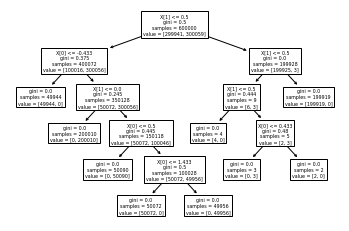

In [25]:
tree.plot_tree(clf)